In [1]:
# !pip install matplotlib

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge, Lasso
import matplotlib.pyplot as plt

In [29]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [37]:
X_columns = ['Open', 'High', 'Low', 'Volume']
X_values = df_train[X_columns].values
X_test_values=df_test[X_columns].values
y_values = df_train["Close"].values

In [38]:
split_size=0.06

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size=split_size, random_state=0)

model=Ridge(random_state=0, max_iter=None,alpha=1.8,positive=False)
model.fit(X_train,y_train)

Ridge(alpha=1.8, random_state=0)

In [40]:
y_pred=model.predict(X_test)
print(model, mean_squared_error(y_pred,y_test)**0.5)

Ridge(alpha=1.8, random_state=0) 1.0480279619005435


In [41]:
split_list=list(range(int(1500*split_size)))

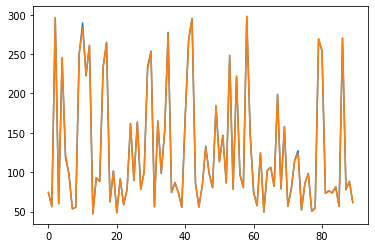

In [42]:
plt.plot(split_list,y_test)
plt.plot(split_list,y_pred)
plt.show()

In [43]:
y_pred_test=model.predict(X_test_values)

df_submission=pd.read_csv("sample_submission.csv")
df_submission["Close"]=y_pred_test
df_submission.to_csv("submission.csv",index=False)